# Reto: Analítica de texto aplicada al estudio de sentimientos para la toma de decisiones


**Objetivo:**

- Construir un corpus utilizando las herramientas que has practicado a lo largo del módulo y realizar las siguientes actividades: calcular las frecuencias de longitudes de texto, frecuencias de palabras más comunes y extensión de vectores de stopwords.

- Realizar las operaciones de procesamiento básico de textos: tokenizar, aplicar stemming, remover stopwords.
- Crear gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.

- Implementar y aplicar el análisis de sentimientos a los textos que se han recopilado en el corpus

## Instrucciones
## 1. Elige uno de los *datasets* para trabajar: En este caso se eligió el dataset de datos financieros. Cuyo archivo es **FinancialTweets.zip**.

## 2. Generar un archivo para el reto, cuya estructura esté basada en los análisis solicitados.

## 3. Del archivo descargado, guarda todos sus registros en un DataFrame.

In [1]:
# Montando google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
print(os.listdir('/content/drive/MyDrive/Colab'))

['stockerbot-export.csv']


In [3]:
# Guardando registros en un dataframe
import pandas as pd
corpus = pd.read_csv('/content/drive/MyDrive/Colab/stockerbot-export.csv',
                     on_bad_lines='skip')
corpus.head(10)

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True
5,1019719465095790600,.@RealMoney's David Butler's favorite FANG sto...,Wed Jul 18 23:04:00 +0000 2018,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,http://bit.ly/2NrYxje,True
6,1019720209786114000,Don’t miss my convo with one of my favorite th...,Wed Jul 18 23:06:58 +0000 2018,ianbremmer,HRS,Harris,https://twitter.com/samharrisorg/status/101971...,True
7,1019720659738480600,U.S. intelligence documents on Nelson Mandela ...,Wed Jul 18 23:08:45 +0000 2018,Reuters,INTC-USB,Intel*U.S.,https://reut.rs/2O0ypNf,True
8,1019720723441635300,Senate wants emergency alerts to go out throug...,Wed Jul 18 23:09:00 +0000 2018,TechCrunch,NFLX,Netflix,https://tcrn.ch/2L8DsgT,True
9,1019721145396887600,Hedge fund manager Marc Larsy says bitcoin $40...,Wed Jul 18 23:10:41 +0000 2018,MarketWatch,BTC,Bitcoin,https://on.mktw.net/2Ntr7k9,True


In [4]:
# Eliminando columnas que no se utilizarán en el análisis
corpus = corpus.drop(columns={'id','timestamp','url'})
corpus.head(10)

,text,source,symbols,company_names,verified
0,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,GS,The Goldman Sachs,True
1,The price of lumber $LB_F is down 22% since hi...,StockTwits,M,Macy's,True
2,Who says the American Dream is dead? https://t...,TheStreet,AIG,American,True
3,Barry Silbert is extremely optimistic on bitco...,MarketWatch,BTC,Bitcoin,True
4,How satellites avoid attacks and space junk wh...,Forbes,ORCL,Oracle,True
5,.@RealMoney's David Butler's favorite FANG sto...,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,True
6,Don’t miss my convo with one of my favorite th...,ianbremmer,HRS,Harris,True
7,U.S. intelligence documents on Nelson Mandela ...,Reuters,INTC-USB,Intel*U.S.,True
8,Senate wants emergency alerts to go out throug...,TechCrunch,NFLX,Netflix,True
9,Hedge fund manager Marc Larsy says bitcoin $40...,MarketWatch,BTC,Bitcoin,True


## 4. Corre la preparación y creación de un corpus: cálculo de frecuencias de longitudes de texto, frecuencias de palabras más comunes, extensión de vectores de stopwords.

## 5. Realiza las operaciones de procesamiento básico: tokenizar, aplicar stemming, remover stopwords

In [5]:
# Importando bibliotecas
import regex as re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))
stopwords_extra = {'inc','ltd','llc','corp'}
stopwords_all = stopwords_en.union(stopwords_extra)

# Limpiar texto de URL, de RT y de entidades HTML
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'https\S+|www\S+', "",texto)
    texto = re.sub(r'\brt\b', '',texto)
    texto = re.sub(r'&\w+;', '',texto)
    texto = re.sub(r'[^a-z\s]', '',texto)
    return texto

# Función para tokenizar texto
def tokenize(texto):
    return texto.split()

# Función para quitar stopwords y palabras cortas
def quita_stopwords(tokens, min_len = 3 ):
    return [t for t in tokens if t not in stopwords_all and len(t) >=min_len]

# Función para preprocesar texto
def preprocesa_texto(texto):
    tokens = limpiar_texto(texto)
    tokens = tokenize(tokens)
    tokens = quita_stopwords(tokens)
    return tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Longitud
corpus['review_len'] = corpus['text'].astype(str).apply(len)
corpus['review_wc'] = corpus['text'].apply(lambda x: len(str(x).split()))

# Tokenizar
corpus['tokens'] = corpus['text'].astype(str).apply(
    preprocesa_texto
)
corpus['tokens_wc'] = corpus['tokens'].apply(len)
corpus.head(10)

,text,source,symbols,company_names,verified,review_len,review_wc,tokens,tokens_wc
0,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,GS,The Goldman Sachs,True,140,23,"[video, office, minding, business, david, solo...",9
1,The price of lumber $LB_F is down 22% since hi...,StockTwits,M,Macy's,True,136,21,"[price, lumber, lbf, since, hitting, ytd, high...",11
2,Who says the American Dream is dead? https://t...,TheStreet,AIG,American,True,60,8,"[says, american, dream, dead]",4
3,Barry Silbert is extremely optimistic on bitco...,MarketWatch,BTC,Bitcoin,True,140,21,"[barry, silbert, extremely, optimistic, bitcoi...",11
4,How satellites avoid attacks and space junk wh...,Forbes,ORCL,Oracle,True,130,15,"[satellites, avoid, attacks, space, junk, circ...",9
5,.@RealMoney's David Butler's favorite FANG sto...,jimcramer,FB-GOOGL-GOOG,Facebook*Alphabet*Alphabet,True,114,12,"[realmoneys, david, butlers, favorite, fang, s...",10
6,Don’t miss my convo with one of my favorite th...,ianbremmer,HRS,Harris,True,91,12,"[dont, miss, convo, one, favorite, thinkers, s...",7
7,U.S. intelligence documents on Nelson Mandela ...,Reuters,INTC-USB,Intel*U.S.,True,105,10,"[intelligence, documents, nelson, mandela, mad...",6
8,Senate wants emergency alerts to go out throug...,TechCrunch,NFLX,Netflix,True,100,14,"[senate, wants, emergency, alerts, netflix, sp...",8
9,Hedge fund manager Marc Larsy says bitcoin $40...,MarketWatch,BTC,Bitcoin,True,83,11,"[hedge, fund, manager, marc, larsy, says, bitc...",8


## 6. Crea gráficas para exploración de textos: histogramas, resumen de sentimientos, t-SNE o WordClouds.

In [20]:
# Preparación para los gráficas
tokens = [tok for tokens in corpus['tokens'] for tok in tokens]

# Función palabras más comunes
'''
La función filtra las palabras más comunes de un corpus.
'''
def palabras_comunes(lista_tokens, top=25):
    counter = Counter(lista_tokens)
    mas_comunes = counter.most_common(top)
    palabras, frecs = zip(*mas_comunes)
    sns.barplot(x=frecs,y=palabras,palette='muted')
    plt.title('Palabras más comunes')
    plt.savefig('/content/drive/MyDrive/Colab/imagenes/mas_comunes.png')
    plt.show()

# Función nube de palabras
'''
Esta función genera una nube de palabras a partir de un corpus
'''
def  nube_palabras(corpus,stopwords,color):
    stopwords = set(stopwords_all)
    wordcloud = WordCloud(
    background_color = color,
    stopwords = stopwords,
    max_words = 100,
    max_font_size = 45,
    min_font_size = 3,
    random_state = 42)

    wordcloud = wordcloud.generate(str(corpus))
    fig = plt.figure(1, figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.savefig('/content/drive/MyDrive/Colab/imagenes/nube_palabras.png')
    plt.show()

/tmp/ipython-input-865400219.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecs,y=palabras,palette='muted')


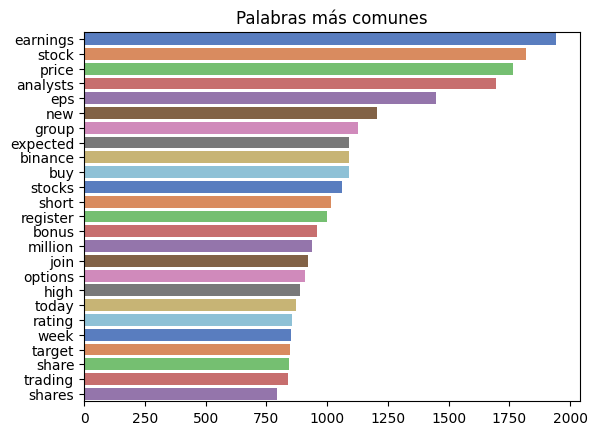

In [21]:
# Palabras más comunes
palabras_comunes(tokens)

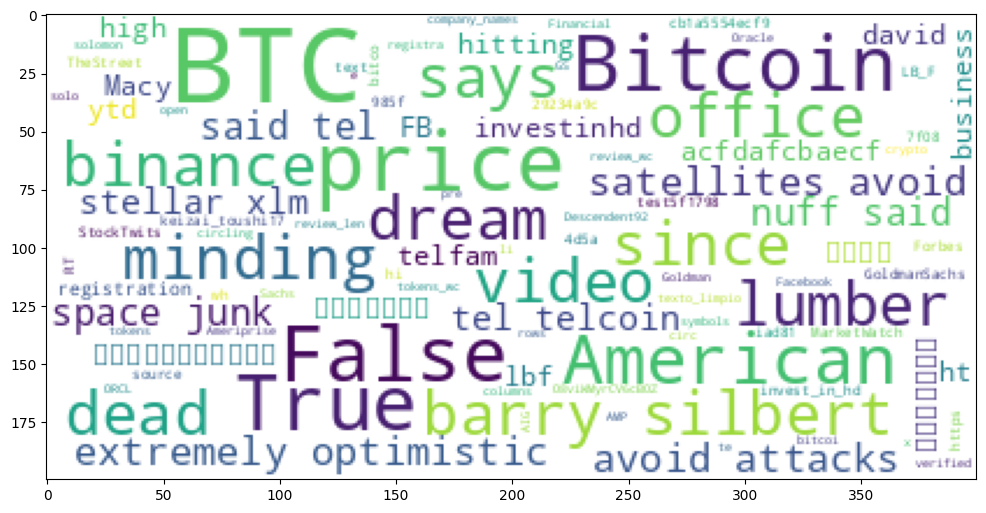

In [22]:
# Nube de palabras
nube_palabras(corpus,stopwords_all,'white')

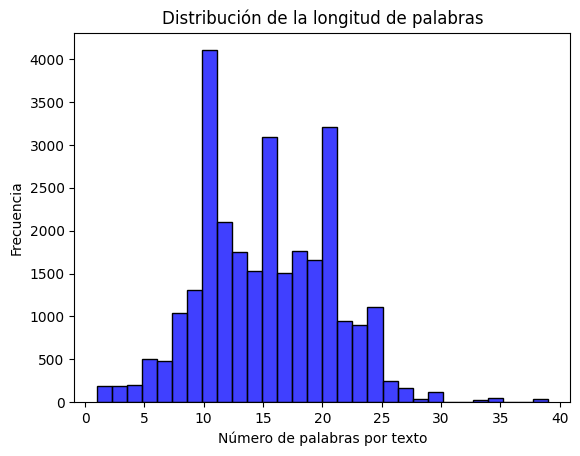

In [23]:
# Longitud de palabras
'''Se omitirán los textos con más de 100 palabras'''
sns.histplot(corpus[corpus['review_wc']<100]['review_wc'],
             bins=30,
             kde=False,
             color='blue')
plt.title('Distribución de la longitud de palabras')
plt.xlabel('Número de palabras por texto')
plt.ylabel('Frecuencia')
plt.savefig('/content/drive/MyDrive/Colab/imagenes/longitud_palabras.png')
plt.show()

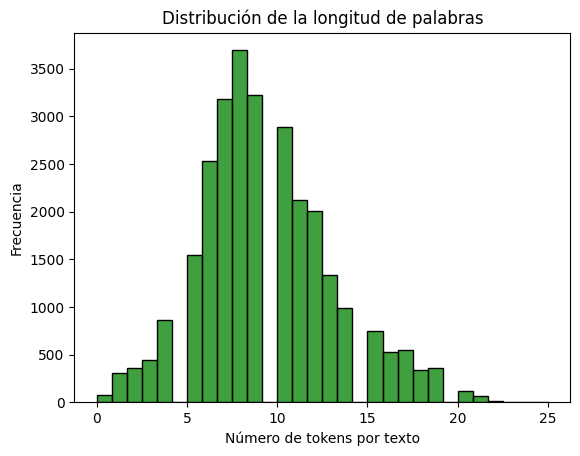

In [24]:
# Longitud de tokens
sns.histplot(corpus[corpus['tokens_wc']<30]['tokens_wc'],
             bins=30,
             kde=False,
             color='green')
plt.title('Distribución de la longitud de palabras')
plt.xlabel('Número de tokens por texto')
plt.ylabel('Frecuencia')
plt.savefig('/content/drive/MyDrive/Colab/imagenes/longitud_tokens.png')
plt.show()

In [12]:
!pip install pysentimiento

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 18.7 MB/s eta 0:00:00


In [13]:
# Análisis de sentimiento
from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="en")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/540M [00:00<?, ?B/s]

bpe.codes: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

In [14]:
# Desactivar wandb
import os
os.environ['WANDB_DISABLED'] = 'true'

In [15]:
# Análisis de sentimientos
corpus['texto_limpio'] = corpus['tokens'].apply(lambda x: ' '.join(x))


In [25]:
sentimiento = [analyzer.predict(t) for t in corpus['texto_limpio']]

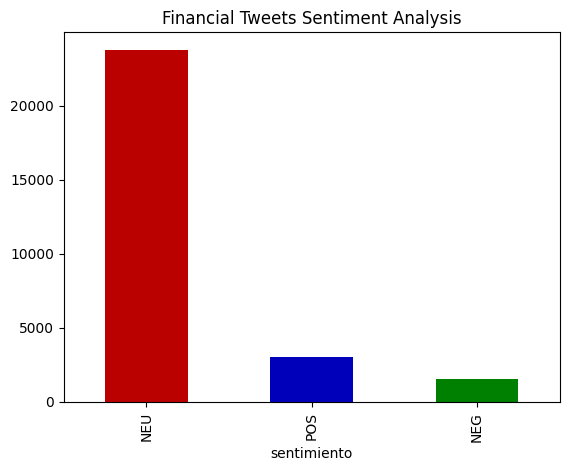

In [26]:
corpus_copia = corpus.copy()
sentimientos = []
for probabilildad in sentimiento:
    sentimientos.append(probabilildad.output)
probabilidades = {'sentimiento':sentimientos}
probabilidades = pd.DataFrame.from_dict(probabilidades)
corpus_copia = pd.concat(
    [corpus_copia,
    probabilidades.reindex(corpus_copia.index)],
    axis=1
)
corpus_copia.to_csv('corpus_sentimiento.csv',sep='\t')
corpus_copia['sentimiento'].value_counts().plot(
    kind='bar',
    color = ['#BB0000', '#0000BB', 'green'],
    title='Financial Tweets Sentiment Analysis'
)
plt.savefig('/content/drive/MyDrive/Colab/imagenes/sentimientos.png')
plt.show()

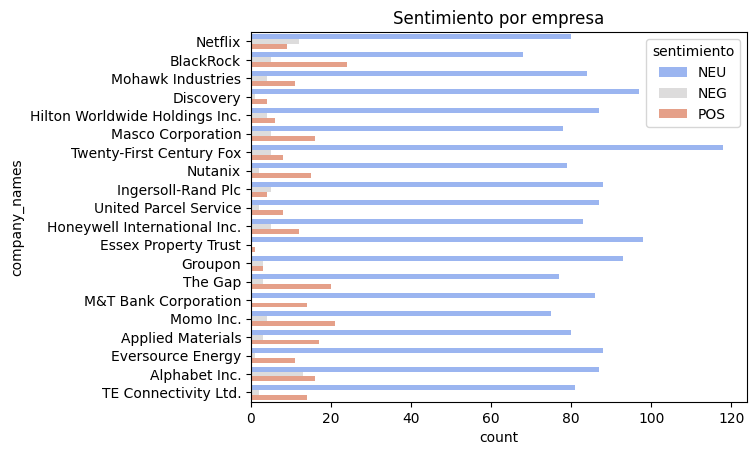

In [27]:
# Sentimienetos por empresa
top_empresas = corpus_copia['company_names'].value_counts().nlargest(20).index
sns.countplot(
    y='company_names',
    hue='sentimiento',
    data=corpus_copia[corpus_copia['company_names'].isin(top_empresas)],
    palette='coolwarm')
plt.title("Sentimiento por empresa")
plt.savefig('/content/drive/MyDrive/Colab/imagenes/sentimiento_empresas.png')
plt.show()

## 7. Agrega una interpretación de resultados obtenidos del análisis realizado.

### Palabras más frecuentes
A partir del análisis de los tweets financieros, las palabras más utilizadas son "earnings, "stocks", "price", "analysts", "eps", etc. Estas se relacionan principamente en los resultados financieros de las empresas, así como el precio de las acciones y la participación de los analistas en la interpretación de estos resultados.

Así mimso con los términos *earnings*  y *EPS (earnings per share)* indica que hay un gran interés en los reportes trimestrales.

### Nube de palabras
La nube de palabras revela los términos más frecuentes dentro del corpus como *BTC, price, True, False, American y optimistic*. Estos términos reflejan un enfoque en el ámbito financiero y criptográfico, donde se discuten temas con el valor de los activos, veracidad de la información y expectativas del mercado. Así mismo, la presencia de nombres propios, como Barry Silbert, y de empresas sugiere que gran parte del discurso se vincula con actores relevantes del sector.

###  Distribución de la longitud de las palabras

La distribución de la longitud de las palabras muestra que la mayoría de los textos son cortos, entre 10 y 25 palabras por tweet. Esto es consistente con la naturaleza de la discusión financiera en redes sociales como Twitter, donde los usuarios comparten noticias, opiniones rápidas, etc.

### Análisis de Sentimientos
En cuanto al análisis de sentimientos, se identificó que predomina el sentimiento neutro, seguido por el positivo y finalmente el negativo. Este resultado es coherente con el tipo de términos encontrados, ya que lo mayoría de tweets tiene un carácter descriptivo.
Por lo tanto, el análisis revela que los tweets tienen a mantener un tono objetivo, lo que refuerza la percepción de que estas publicaciones son utilizadas para difusión y análisis especializado.

Por otra parte, en el análisis de sentimiento por empresa, predonima igualmente el sentimiento neutro, lo que coincide con el carácter informativo y objetivo de los tweets. El sentimiento positivo ocupa el segundo lugar en la mayor parte de las empresas, a excepción de Netflix.



In [29]:
import nbformat

notebook_path = "/content/drive/MyDrive/DS_C6_SC5_GuzmanRodriguezAndres.ipynb"

# Cargar notebook
with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Limpiar solo metadata.widgets corruptos
for cell in nb.cells:
    if "metadata" in cell and "widgets" in cell.metadata:
        del cell.metadata["widgets"]

# Guardar notebook limpio
with open(notebook_path, "w", encoding="utf-8") as f:
    nbformat.write(nb, f)
